<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='15'><b> Pandas DataFrame III - 
    Advanced </b></font> <br><font color='#FC7307' size=6>Student Copy</font></p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'></h4>

---


> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

<h2> References </h2>

* Pandas Reference Guide https://pandas.pydata.org/pandas-docs/stable/

# <a name="toc-9"></a> Table of contents 

1. [Pandas Aggregation](#groupby)
2. [Pivoting](#pivot)
3. [Window Functions](#window)
4. [Sampling](#sampling)
5. [SQL in Pandas](#sql)


<h2> Pandas Cheatsheet </h2>
<img src='https://s3.amazonaws.com/weclouddata/images/python/pandas_cheatsheet.png' width='80%'>

    
<br>

# <a name="groupby"></a><font color='#347B98'> 1. Pandas Aggregation and Grouping </font> <font size='3'>[Back to TOC](#toc-9)</font>

An essential piece of analysis of large data is efficient summarization: computing aggregations like `sum(), mean(), median(), min(), and max()`, in which a single number gives insight into the nature of a potentially large dataset. 

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## $\Delta$ 1.1 - Simple Aggregation

<center> ** List of aggregation functions in Pandas ** </center>

|Aggregation	|Description|
|---|---|
|count()	|Total number of items|
|first(), last()	|First and last item|
|mean(), median()	|Mean and median|
|min(), max()	|Minimum and maximum|
|std(), var()	|Standard deviation and variance|
|mad()	|Mean absolute deviation|
|prod()	|Product of all items|
|sum()	|Sum of all items|

### <font color='#FC7307'> Aggregation - Example 1

In [154]:
random = np.random.RandomState(42) # use the same random seed 
s = pd.Series(random.rand(5))
s

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [155]:
df = pd.DataFrame({'A': random.rand(5),
                   'B': random.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


#### Column-wise aggregation

> For a DataFrame, by default the aggregates return results within each column


In [156]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

#### Row-wise aggregation

In [157]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

### <font color='#FC7307'> Aggregation - Example 2

In [158]:
!pip install seaborn

In [159]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [160]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [161]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


#### Summary statistics - `describe()`

In [162]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


#### Column count - `count()`

In [163]:
planets.count()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

In [164]:
planets.size

6210

## <font color='#559E54'> $\Delta$ 1.2 - Pandas Groupby - `split | apply | combine` </font>

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the `groupby` operation. The name **`"group by"`** comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: `split, apply, combine`.

<img src='https://s3.amazonaws.com/weclouddata/images/python/split-apply-combine.svg' width='50%'>

### $\delta$ 1.2.1 Understanding `GroupBy`

Here is what the groupby accomplishes:
* The `split` step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The `apply` step involves computing some function, usually an `aggregate, transformation, or filtering, within the individual groups`.
* The `combine` step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that the intermediate splits do not need to be explicitly instantiated. Rather, the `GroupBy` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way. The power of the GroupBy is that it abstracts away these steps: the user need not think about how the computation is done under the hood, but rather thinks about the operation as a whole.

Analogous to the following in SQL:
```SQL
SELECT name, sum(sales) from SALES
GROUP BY name
```

In [165]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [166]:
df.groupby('key')

> Notice that what is returned is not a set of DataFrames, but a **`DataFrameGroupBy object`**. This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This `"lazy evaluation"` approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

> To produce a result, we can apply an aggregate to this DataFrameGroupBy object, which will perform the appropriate apply/combine steps to produce the desired result

In [167]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### <font color='#FC7307'>  $\delta$ 1.2.2 The GroupBy Object </font>

The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood. Let's see some examples using the Planets data.

#### DataFrameGroupBy Object - Column Indexing

In [168]:
planets.groupby('method')

In [48]:
#dir(planets.groupby('method'))

In [169]:
planets.groupby('method')['orbital_period']

In [170]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

#### Iterating over groups
The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame

In [171]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


#### Dispatch methods
Through some Python class magic, any method not explicitly implemented by the `GroupBy` object will be passed through and called on the groups, whether they are DataFrame or Series objects. 

In [172]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### <font color='#FC7307'>  $\delta$ 1.2.3 `aggregate() | filter() | transform() | apply()` </font>

The most important operations made available by a GroupBy are 
* `aggregate`, 
* `filter`,   
* `transform`,  
* `apply`. 


### <font color='#559E54'> groupby - aggregate() </font>

In [173]:
random = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': random.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### `aggregate()` - same calculation to all columns

In [174]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

#### `aggregate()` - different calculations to different columns

In [176]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data2,data1
key,,
A,5,0
B,7,1
C,9,2


### <font color='#559E54'> groupby - filter() </font>

A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value

In [177]:
random = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': random.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [178]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [179]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


**Mini-Lab**

> Can you try a lambda function for the above example? 

In [180]:
### Your code below








,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


> The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

### <font color='#559E54'> groupby - transform </font>

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean.

In [181]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [185]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### <font color='#559E54'> groupby - apply() </font>

The `apply()` method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

In [187]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [188]:
df.sort_values(by='key')

,key,data1,data2
0,A,0,5
3,A,3,3
1,B,1,0
4,B,4,7
2,C,2,3
5,C,5,9


In [189]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### <font color='#FC7307'>  $\delta$ 1.2.4 Flexible ways of specifying the split `key` </font>

* A list, array, series, or index providing the grouping keys
* A dictionary or series mapping index to group
* Any Python function
* A list of valid keys

In [190]:
random = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': random.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### A list, array, series, or index providing the grouping keys
* The key can be any series or list with a length matching that of the DataFrame. 

In [191]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [99]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


#### A dictionary or series mapping index to group


In [192]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


#### Any Python function as groupby `key`

In [193]:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


#### A list of valid keys

In [194]:
# groupby multiple keys
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## $\Delta$ <font color='#559E54'> 1.3 - Aggregation Lab


### Lab 1 - Bike Share Data

**Questions:**
1. Read the trip data `https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/201801-fordgobike-tripdata.csv`
2. Use aggregation to calculate the following stats between `start_station_name` and `end_station_name`
    - num of trips between any two stations
    - avg/min/max durations between any two stations
3. Rename the aggregation columns
4. Find all start/end station pairs that have num of trips > 300

**Expected Output**


start_station_name  \
                                                           
3268                                  Berry St at 4th St   
8738    Montgomery St BART Station (Market St at 2nd St)   
10573  San Francisco Ferry Building (Harry Bridges Pl...   
11903                      The Embarcadero at Sansome St   

                                        end_station_name duration_sec  \
                                                            num_trips   
3268   San Francisco Ferry Building (Harry Bridges Pl...          321   
8738                                 S Park St at 3rd St          320   
10573                      The Embarcadero at Sansome St          473   
11903                            Steuart St at Market St          318   

                                                                      
      avg_duration_seconds min_duration_seconds max_duration_seconds  
3268            729.140187                  382                 4491  
8738            625.278125                  291                51541  
10573          1294.522199                  216                70893  
11903           381.792453                  229                 1469

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/201801-fordgobike-tripdata.csv')
# Calculate the number of rows in the dataset
num_rows = df.shape[0]
print('Rows: {}'.format(num_rows))

Rows: 94802


In [1]:
# Your Code Below






 
<br>

# <a name="pivot"></a><font color='#347B98'> 2. Pivot Table </font> <font size='3'>[Back to TOC](#toc-9)</font>
    
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; one can think of pivot tables as essentially **`a multidimensional version of GroupBy aggregation`**. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [196]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


## $\Delta$ 2.1 - Traditional way of pivot

In [198]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [199]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## $\Delta$ 2.2 - Pandas `pivot_table`

In [200]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables

In [201]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class', aggfunc='mean')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [202]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

## $\Delta$ <font color='#559E54'> 2.3 - Pivot Table Lab
    
### Lab 2 - Bike Share Data

**Questions:**
1. Read the trip data `https://s3.amazonaws.com/weclouddata/datasets/random/201801-fordgobike-tripdata.csv`
2. Read teh station data `https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/sf_bike_share_station.csv`
3. Merge the two tables to have `start_city_name`, `end_city_name` of each trip in the same table
4. Calculate the number of trips between each pair of start_city and end_city
5. Create a pivot table to have start_city as row index and end_city as columns, and trip count as values

**Expected Output**


In [222]:
# Expected output

city_start,Mountain View,Palo Alto,Redwood City,San Francisco,San Jose
city_end,,,,,
Mountain View,440,196,952,775,1185
Palo Alto,109,59,221,411,130
Redwood City,616,465,335,1787,996
San Francisco,817,426,1770,4214,2117
San Jose,961,247,1028,2308,2546


In [ ]:
#######################
# Your Code Below
#######################

In [51]:
import pandas as pd
sf_bike_share = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/201801-fordgobike-tripdata.csv')
sf_bike_station = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/sf_bike_share_station.csv')

In [175]:
sf_bike_share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [68]:
#sf_bike_station.head()

<br>

## $\Delta$ <font color='#559E54'> 2.4 - Pivot Table Lab
    
### Lab 3 - Sales Funnel Analysis

**Questions:**

> Install `xlrd` if you want to use `pd.read_xlsx`

In [98]:
#!pip install xlrd --user

In [69]:
import pandas as pd
import numpy as np

In [99]:
df = pd.read_excel("https://s3.amazonaws.com/weclouddata/datasets/random/sales-funnel.xlsx")
df.head(5)

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [73]:
df["Status"] = df["Status"].astype("category")

In [85]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [86]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


#### Lab3-Q1: Create a pivot table that has 

- `Manager` and `Rep` as index, and 
- average `Price` as values

In [100]:
#######################
# Your Code Below
#######################



Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

#### Lab3-Q2: Create a pivot table that has 

- `Manager` and `Rep` as index, and 
- total `Price` as values

In [103]:
#######################
# Your Code Below
#######################



Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

#### Lab3-Q3: Create a pivot table that has 

- `Manager` and `Rep` as index, and 
- total `Price` and `number of products` as values

In [104]:
#######################
# Your Code Below
#######################



mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

#### Lab3-Q4: Create a pivot table that has 

- `Manager` and `Rep` as index, 
- total `Price` as values, and 
- `Product` as column index

In [105]:
#######################
# Your Code Below
#######################



sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

#### Lab3-Q5: Create a pivot table that has 

- `Manager` and `Rep` as index, 
- total `Price` as values, and 
- `Product` as column index
- replace missing values in pivot table with `fill_value`

In [106]:
#######################
# Your Code Below
#######################



sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

#### Lab3-Q6: Create a pivot table that has :

- `Manager`, `Rep`, and `Product` as index, 
- total and average `Price` and `Quantity` as values, and 
- `Product` as column index
- replace missing values in pivot table with `fill_value`
- **also display a total/all column**

In [107]:
#######################
# Your Code Below
#######################



sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706

#### Lab3-Q7: Create a pivot table that has :

- `Manager`, `Status` as index, 
- `Product` as column index
- **count** of `Quantity` and **total** `Price` as values, and 
- replace missing values in pivot table with `fill_value`

In [109]:
#######################
# Your Code Below
#######################



Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  declined    70000           0       0        0        2   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              won         65000           0       0        0        1   
Fred Anderson declined    65000           0       0        0        1   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              won        165000        7000       0        0        2   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  declined            0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              won                 0       0        0  
Fred Anderson declined            0       0        0  
              pending             1       0        0  
              presented           0       1        1  
              won                 1       0        0

#### Lab3-Q8: Create a pivot table that has :

- `Manager`, `Status` as index, 
- `Product` as column index
- **count** of `Quantity` and **total & average** `Price` as values, and 
- replace missing values in pivot table with `fill_value`
- **Also, create a new dataframe called `table`

In [112]:
#######################
# Your Code Below
#######################



Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

#### Lab3-Q9: 

- Filter on the previous pivot `table` by selecting `Manager` "Debra Henley"


In [151]:
#######################
# Your Code Below
#######################



Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley declined   35000           0       0        0  70000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley declined        0        0        2           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             won             0        0        1           0       0        0

#### Lab3-Q10: 

- Filter on the previous pivot `table` by selecting `Status` "pending" and "won"


In [97]:
#######################
# Your Code Below
#######################



Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0

<img src='https://s3.amazonaws.com/weclouddata/images/python/pivot-table-datasheet.png' width='60%'>

<br>

# <a name="window"></a><font color='#347B98'> 3. Window Function </font> <font size='3'>[Back to TOC](#toc-9)</font>    
The way that pandas implements window functions is mainly through the operators `rolling` and `expanding`. When called on a pandas Series or Dataframe, they return a Rolling or Expanding object that enables grouping over a rolling or expanding window, respectively.

## $\Delta$ 3.1 Rolling

In [231]:
df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/sf_bike_share_trips.csv')

In [232]:
df.head()

,date,start_station_id,city,trips
0,2013-08-29 00:00:00,2.0,San Jose,5
1,2013-08-29 00:00:00,3.0,San Jose,9
2,2013-08-29 00:00:00,4.0,San Jose,3
3,2013-08-29 00:00:00,5.0,San Jose,3
4,2013-08-29 00:00:00,6.0,San Jose,4


In [233]:
# Sort the dataframe by the "date" column
df = df.sort_values(by="date")

In [234]:
df.head()

,date,start_station_id,city,trips
0,2013-08-29 00:00:00,2.0,San Jose,5
32,2013-08-29 00:00:00,48.0,San Francisco,21
33,2013-08-29 00:00:00,49.0,San Francisco,18
34,2013-08-29 00:00:00,50.0,San Francisco,43
35,2013-08-29 00:00:00,51.0,San Francisco,14


In [235]:
# Reindex the dataframe to use the "date" column as the index
df = df.set_index("date")
df.head()

,start_station_id,city,trips
date,,,
2013-08-29 00:00:00,2.0,San Jose,5
2013-08-29 00:00:00,48.0,San Francisco,21
2013-08-29 00:00:00,49.0,San Francisco,18
2013-08-29 00:00:00,50.0,San Francisco,43
2013-08-29 00:00:00,51.0,San Francisco,14


In [236]:
# Create new 14-day moving average dimension in the dataframe
df["mvg_avg"] = df.trips.rolling(14).mean()

In [239]:
df.head(20)

,start_station_id,city,trips,mvg_avg
date,,,,
2013-08-29 00:00:00,2.0,San Jose,5,NaN
2013-08-29 00:00:00,48.0,San Francisco,21,NaN
2013-08-29 00:00:00,49.0,San Francisco,18,NaN
2013-08-29 00:00:00,50.0,San Francisco,43,NaN
2013-08-29 00:00:00,51.0,San Francisco,14,NaN
2013-08-29 00:00:00,54.0,San Francisco,11,NaN
2013-08-29 00:00:00,55.0,San Francisco,6,NaN
2013-08-29 00:00:00,56.0,San Francisco,10,NaN
2013-08-29 00:00:00,57.0,San Francisco,12,NaN


## $\Delta$ 2.2 Expanding

### 2.2.1 Calculating Running Total

In [240]:
df["running_total_trips_exp"] = df.trips.expanding().sum()

In [241]:
df["running_total_trips"] = df.trips.cumsum()

In [ ]:
df.head()

### 2.2.2 Calculate Week-over-week Diff and Percentage Change

In [248]:
df["wow_diff"] = df.trips.diff(7)

df["wow_percent_change"] = df.trips.pct_change(7)

df.head()

### 2.2.3 Calculate Weighted Moving Average

In [249]:
df["ewma"] = df.trips.ewm(span=14).mean()

df.tail()

,start_station_id,city,trips,mvg_avg,running_total_trips_exp,running_total_trips,wow_percent_change,wow_diff,ewma
date,,,,,,,,,
2015-08-31 00:00:00,39.0,San Francisco,29,7.214286,669900.0,669900,1.900000,19.0,8.231333
2015-08-31 00:00:00,41.0,San Francisco,19,8.428571,669919.0,669919,5.333333,16.0,9.667156
2015-08-31 00:00:00,42.0,San Francisco,30,10.428571,669949.0,669949,2.750000,22.0,12.378202
2015-08-31 00:00:00,46.0,San Francisco,6,10.357143,669955.0,669955,1.000000,3.0,11.527775
2015-08-31 00:00:00,84.0,San Jose,4,9.000000,669959.0,669959,1.000000,2.0,10.524071


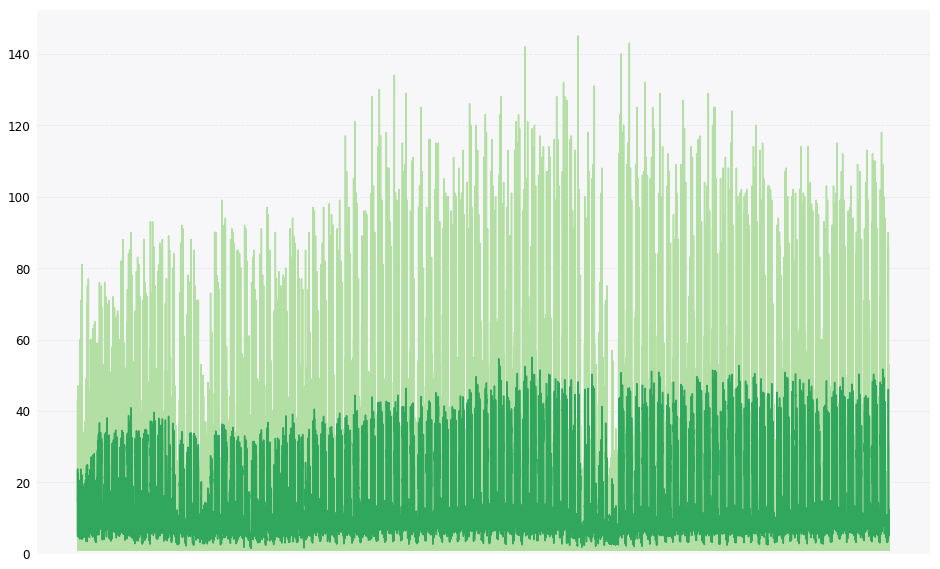

In [251]:
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)

# Plot pageviews
df.trips.plot(color='#b3dea4', fontsize=12, ax=ax)

# Plot pageview moving average
df.mvg_avg.plot(color='#30a75c', fontsize=12, ax=ax)

# Despine the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis label
ax.set_xlabel('')

# Set the facecolor
ax.set_facecolor('#f7f7f9')

# Set the limits for the y-axis
ax.set_ylim(bottom=0)

# Adjust the appearance of the grid lines
ax.grid(b=True, axis='y', alpha=0.2, linestyle='dashed')

# Remove the tick marks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")



    
<br>

# <a name="sampling"></a><font color='#347B98'> 4. Sampling </font> <font size='3'>[Back to TOC](#toc-9)</font>

## $\Delta$ <font color='#559E54'>  4.1 Random Sampling using `random.sample`


In [2]:
import pandas as pd
df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/201801-fordgobike-tripdata.csv')

In [17]:
%%timeit

import random

def randomSample(x, n):
    return x.loc[random.sample(list(x.index), n)]

randomSample(df, 100)

3.88 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## $\Delta$ <font color='#559E54'>  4.2 Random Sampling using `pandas.sample`


### Fraction based random sampling

In [20]:
# Randomly sample 70% of your dataframe

df_frac = df.sample(frac=0.7)
df_frac.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
79902,518,2018-01-07 09:24:33.5980,2018-01-07 09:33:11.6470,28,The Embarcadero at Bryant St,37.787168,-122.388098,37,2nd St at Folsom St,37.785000,-122.395936,2331,Subscriber,1995.0,Male,No
9525,185,2018-01-29 20:08:31.0320,2018-01-29 20:11:36.2390,243,Bancroft Way at College Ave,37.869360,-122.254337,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,1642,Subscriber,1995.0,Female,No
44235,1895,2018-01-19 09:29:40.9320,2018-01-19 10:01:16.6150,130,22nd St Caltrain Station,37.757369,-122.392057,25,Howard St at 2nd St,37.787522,-122.397405,3614,Subscriber,1987.0,Male,No
29290,783,2018-01-23 21:27:37.5690,2018-01-23 21:40:41.0340,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98,Valencia St at 16th St,37.765052,-122.421866,2168,Subscriber,1976.0,Male,Yes
26127,763,2018-01-24 22:50:38.2000,2018-01-24 23:03:21.5270,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,558,Subscriber,1981.0,Male,No


In [ ]:
df_rest = df.loc[~df.index.isin(df_df_frac.index)]

### Count based random sample

In [13]:
# Randomly sample 100 rows from your dataframe

df_elements = df.sample(n=100)

2.52 ms ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## $\Delta$ <font color='#559E54'>  4.3 Stratified Sampling using Pandas


### Stratified sampling with `fixed n`

In [34]:
df = pd.DataFrame(dict(
        ID=[random.randint(10000,99999) for i in range(40)],
        City=['Toronto']*10 + ['Ottawa']*10 + ['Halifax']*10 + ['Montreal']*10
    ))

In [37]:
df.groupby('City').apply(lambda x: x.sample(n=5))

City     ID
City                        
Halifax  22   Halifax  55314
         28   Halifax  24567
         25   Halifax  49303
         20   Halifax  53329
         21   Halifax  29919
Montreal 39  Montreal  68300
         38  Montreal  21095
         30  Montreal  36076
         37  Montreal  48286
         33  Montreal  71663
Ottawa   18    Ottawa  84329
         19    Ottawa  80229
         13    Ottawa  88834
         17    Ottawa  54542
         16    Ottawa  79269
Toronto  2    Toronto  17499
         8    Toronto  70050
         7    Toronto  33858
         0    Toronto  98567
         4    Toronto  72424

### Stratified sampling with `fixed fraction`

In [ ]:
df = pd.DataFrame(dict(
        ID=[random.randint(10000,99999) for i in range(40)],
        City=['Toronto']*10 + ['Ottawa']*10 + ['Halifax']*10 + ['Montreal']*10
    ))

In [46]:
df.groupby('City').apply(lambda x: x.sample(frac=0.25))

City     ID
City                        
Halifax  32   Halifax  49501
Montreal 39  Montreal  38232
Ottawa   27    Ottawa  67782
         20    Ottawa  17443
         25    Ottawa  42081
Toronto  3    Toronto  48165
         6    Toronto  14024
         19   Toronto  25669
         4    Toronto  80094
         7    Toronto  42242

### Stratified sampling when some groups are two small

> If the group size is too small w.r.t. the proportion like groupsize 1 and propotion .25, then no item will be returned. This is due to pythons rounding implementation of the int function int(0.25)=0

In [39]:
df = pd.DataFrame(dict(
        ID=[random.randint(10000,99999) for i in range(40)],
        City=['Toronto']*20 + ['Ottawa']*12 + ['Halifax']*5 + ['Montreal']*3
    ))

In [43]:
df.groupby('City', group_keys=False).apply(lambda x: x.sample(n=6))

ValueError: Cannot take a larger sample than population when 'replace=False'

In [42]:
df.groupby('City', group_keys=False).apply(lambda x: x.sample(min(len(x), 6)))

,City,ID
36,Halifax,76610
34,Halifax,61262
32,Halifax,49501
33,Halifax,50183
35,Halifax,69067
38,Montreal,19483
39,Montreal,38232
37,Montreal,23463
25,Ottawa,42081
22,Ottawa,86384


<br>

# <a name="sql"></a><font color='#347B98'> 5. SQL Queries with `pandasql` </font> <font size='3'>[Back to TOC](#toc-9)</font> 

In [53]:
!pip install pandasql --user

  Running setup.py install for pandasql ... done


In [58]:
from pandasql import sqldf

df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/bay_area_bike_data/201801-fordgobike-tripdata.csv')

In [62]:
q = """
 SELECT
 *
 FROM
 df
 LIMIT 10;"""

sqldf(q, locals()).head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,None,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,None,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [63]:
q = """
 SELECT
 *
 FROM
 df
 LIMIT 10;"""

sqldf(q, globals()).head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,None,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,None,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


<br>

# <a name="excel"></a><font color='#347B98'> 6. Manipulation Excel with `XlsxWriter` </font> <font size='3'>[Back to TOC](#toc-9)</font> 

In [64]:
!pip install XlsxWriter --user

    100% |████████████████████████████████| 143kB 21.7MB/s 


In [2]:
import random
import pandas as pd

# Some sample data to plot.
cat_2 = ['y' + str(x) for x in range(1, 9)]
index_2 = range(1, 21, 1)
multi_iter2 = {'index': index_2}
for cat in cat_2:
    multi_iter2[cat] = [random.randint(10, 100) for x in index_2]

# Create a Pandas dataframe from the data.
index_2 = multi_iter2.pop('index')
df = pd.DataFrame(multi_iter2, index=index_2)
df = df.reindex(columns=sorted(df.columns))

# Create a Pandas Excel writer using XlsxWriter as the engine.
excel_file = 'scatter.xlsx'
sheet_name = 'Sheet1'

writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')
df.to_excel(writer, sheet_name=sheet_name)

# Access the XlsxWriter workbook and worksheet objects from the dataframe.
workbook = writer.book
worksheet = writer.sheets[sheet_name]

# Create a chart object.
chart = workbook.add_chart({'type': 'scatter'})

# Configure the series of the chart from the dataframe data.
max_row = len(df)
for i in range(len(cat_2)):
    col = i + 1
    chart.add_series({
        'name':       ['Sheet1', 0, col],
        'categories': ['Sheet1', 1, 0, max_row, 0],
        'values':     ['Sheet1', 1, col, max_row, col],
        'marker':     {'type': 'circle', 'size': 7},
    })

# Configure the chart axes.
chart.set_x_axis({'name': 'Index'})
chart.set_y_axis({'name': 'Data Value',
                  'major_gridlines': {'visible': False}})


# Insert the chart into the worksheet.
worksheet.insert_chart('K2', chart)

# Close the Pandas Excel writer and output the Excel file.
writer.save()